In [1]:
import numpy as np
import matplotlib.pylab as plt
from classy import Class

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

### Input Cosmologies

$$\left[\Omega_{\textrm{cdm}}h^{2}, \Omega_{\textrm{b}}h^{2}, \textrm{ln}(10^{10}A_{\textrm{s}}), n_{s}, h\right]$$

All parameters are kept fixed, except $\Omega_{\textrm{cdm}}h^{2}$.

In [2]:
# this is our reference point in parameter space
par = [0.1295, 0.0224, 2.895, 0.9948, 0.7411]

# dictionary for setting CLASS' key quantities
inputs_class = {'P_k_max_h/Mpc': 5.0, 'z_max_pk': 4.66, 'non linear': 'halofit', 'output': 'mPk'}

### Ratio Calculation

$$P_{\delta}(k,z)=A(z)[1+q(k,z)]P_{\textrm{lin}}(k,z_{0})$$

In the code below, we will compute $1 + q(k,z)$, at fixed values of $z$ and $z_{0}$.

In [3]:
def class_run(k: float, omega_cdm: float, z: float = 4.66, z0: float = 0.0) -> float:
    '''
    Function the factor 1 + q(k,z).

    Inputs
    ------
    k (float) - the wavenumber

    omega_cdm (float) - cold dark matter component, this is, omega_cdm h^2

    z (float) - the redshift at which the power spectrum is calculated (default : 4.66)

    z0 (float) - the reference redshift (default: 0.0)

    Returns
    -------
    ratio (float) - the factor 1 + q(k,z)
    '''

    cosmo = {'omega_cdm': omega_cdm, 'omega_b': par[1], 'ln10^{10}A_s': par[2], 'n_s': par[3], 'h': par[4]}

    # instantiate Class
    class_module = Class()

    # set cosmology
    class_module.set(cosmo)

    # set basic configurations for Class
    class_module.set(inputs_class)

    # compute the important quantities
    class_module.compute()

    # k is in Mpc^-1
    # calculate the non-linear matter power spectrum
    pk_non = class_module.pk(k * par[4], z)
    
    # calculate the linear matter power spectrum
    pk_lin = class_module.pk_lin(k * par[4], z0)

    # get the factor A
    a_fact = class_module.scale_independent_growth_factor(z)**2

    # calculate ratio
    ratio = pk_non / (a_fact * pk_lin)

    # empty Class module - unnecessarily accumulates memory
    class_module.struct_cleanup()
    class_module.empty()

    return ratio

### Run CLASS at fixed $k$, varying $\Omega_{\textrm{cdm}}h^{2}$

In [4]:
min_cdm = 0.01
max_cdm = 0.40
npoint  = 100
cdm_range = np.linspace(min_cdm, max_cdm, npoint)

In [5]:
# run CLASS for a small value of k, k = 1E-4 
r1 = [class_run(k=1.E-4, omega_cdm=cdm_range[i]) for i in range(npoint)]

# run CLASS for a large value of k, k = 1.5
r2 = [class_run(k=1.5, omega_cdm=cdm_range[i]) for i in range(npoint)]

### Plot the Results

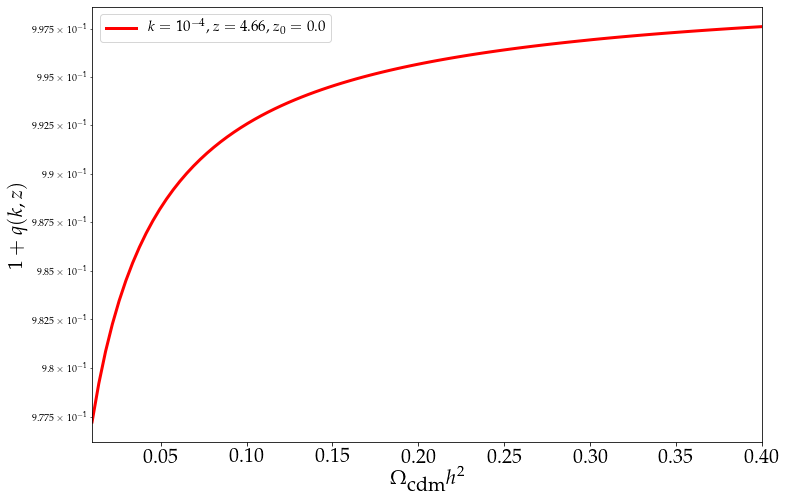

In [6]:
plt.figure(figsize = figSize)
plt.plot(cdm_range,r1, lw = 3, label=r'$k=10^{-4}, z = 4.66, z_{0}=0.0$', c = 'r')
plt.ylabel(r'$1+q(k,z)$', fontsize = fontSize)
plt.xlabel(r'$\Omega_{\textrm{cdm}}h^{2}$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.yscale('log')
plt.xlim(min_cdm, max_cdm)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
# plt.savefig('pk_1.pdf', bbox_inches = 'tight')
plt.show()

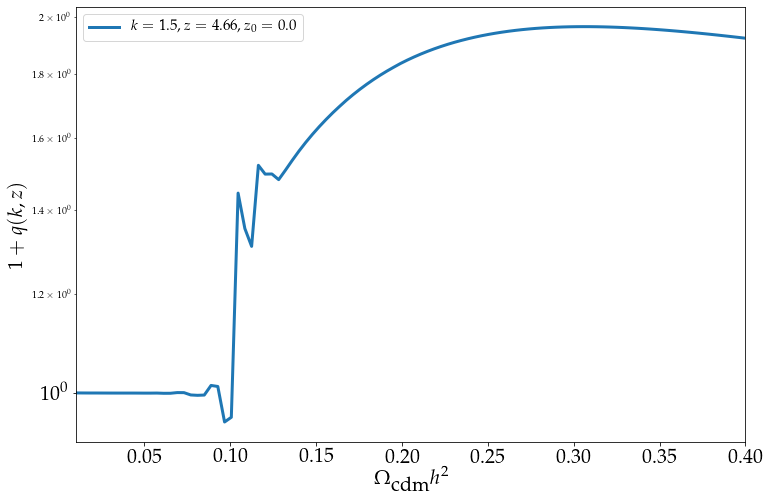

In [7]:
plt.figure(figsize = figSize)
plt.plot(cdm_range,r2, lw = 3, label=r'$k=1.5, z = 4.66, z_{0}=0.0$')
plt.ylabel(r'$1+q(k,z)$', fontsize = fontSize)
plt.xlabel(r'$\Omega_{\textrm{cdm}}h^{2}$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.yscale('log')
plt.xlim(min_cdm, max_cdm)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
# plt.savefig('pk_2.pdf', bbox_inches = 'tight')
plt.show()